In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv")

df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [2]:
# get an overview
print(df.info())
print(df.describe())
print(df.isna().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [3]:
# as seen above, the result of this should be zero, but out of habit, I like to calculate the percentage
missing_values = df.isnull().sum()
missing_rate = (missing_values / len(df)) * 100
print(missing_rate)

# no missing values to replace

Patient Number         0.0
Sadness                0.0
Euphoric               0.0
Exhausted              0.0
Sleep dissorder        0.0
Mood Swing             0.0
Suicidal thoughts      0.0
Anorxia                0.0
Authority Respect      0.0
Try-Explanation        0.0
Aggressive Response    0.0
Ignore & Move-On       0.0
Nervous Break-down     0.0
Admit Mistakes         0.0
Overthinking           0.0
Sexual Activity        0.0
Concentration          0.0
Optimisim              0.0
Expert Diagnose        0.0
dtype: float64


In [4]:
df.duplicated().sum()

# no duplicates to remove

0

In [5]:
# to see if the values in the columns are correct or have to be altered

column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,":",df[column_name].unique())
    
df.value_counts(normalize=True)

count = df.nunique()

# 'Patiant' is spelled incorrectly and with a hyphen, this has to be altered
# 4 columns have 4 values ranging on a spectrum and can be replaced with integers according to frequency
# in 'suicidal thoughts' there are two types of yes, one has to go
# three columns have values from 1 to 10, they can be replaced with only integers

Patient Number : ['Patiant-01' 'Patiant-02' 'Patiant-03' 'Patiant-04' 'Patiant-05'
 'Patiant-06' 'Patiant-07' 'Patiant-08' 'Patiant-09' 'Patiant-10'
 'Patiant-11' 'Patiant-12' 'Patiant-13' 'Patiant-14' 'Patiant-15'
 'Patiant-16' 'Patiant-17' 'Patiant-18' 'Patiant-19' 'Patiant-20'
 'Patiant-21' 'Patiant-22' 'Patiant-23' 'Patiant-24' 'Patiant-25'
 'Patiant-26' 'Patiant-27' 'Patiant-28' 'Patiant-29' 'Patiant-30'
 'Patiant-31' 'Patiant-32' 'Patiant-33' 'Patiant-34' 'Patiant-35'
 'Patiant-36' 'Patiant-37' 'Patiant-38' 'Patiant-39' 'Patiant-40'
 'Patiant-41' 'Patiant-42' 'Patiant-43' 'Patiant-44' 'Patiant-45'
 'Patiant-46' 'Patiant-47' 'Patiant-48' 'Patiant-49' 'Patiant-50'
 'Patiant-51' 'Patiant-52' 'Patiant-53' 'Patiant-54' 'Patiant-55'
 'Patiant-56' 'Patiant-57' 'Patiant-58' 'Patiant-59' 'Patiant-60'
 'Patiant-61' 'Patiant-62' 'Patiant-63' 'Patiant-64' 'Patiant-65'
 'Patiant-66' 'Patiant-67' 'Patiant-68' 'Patiant-69' 'Patiant-70'
 'Patiant-71' 'Patiant-72' 'Patiant-73' 'Patiant-74' 'Patia

In [6]:
# strip the patient number down to only the integers and change the format from string to integer
df['Patient Number'] = df['Patient Number'].str[8:].astype(int)

In [7]:
# replace the frequency values with numbers 
pd.set_option('future.no_silent_downcasting', True)

dict = {'Seldom': 1, 'Sometimes': 2, 'Usually': 3, 'Most-Often': 4}

df['Sadness'] = df['Sadness'].replace(dict).astype(int)
df['Euphoric'] = df['Euphoric'].replace(dict).astype(int)
df['Exhausted'] = df['Exhausted'].replace(dict).astype(int)
df['Sleep dissorder'] = df['Sleep dissorder'].replace(dict).astype(int)

In [8]:
# remove the wrong spelling
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace('YES ', 'YES')

In [9]:
# replace the values from 1 to 10 with only integers and change type accordingly
pd.set_option('future.no_silent_downcasting', True)

dict = {'3 From 10': 3, '4 From 10': 4, '6 From 10': 6, '5 From 10': 5, '7 From 10': 7, '8 From 10': 8,
 '9 From 10': 9, '2 From 10': 2, '1 From 10': 1}

df['Sexual Activity'] = df['Sexual Activity'].replace(dict).astype(int)
df['Concentration'] = df['Concentration'].replace(dict).astype(int)
df['Optimisim'] = df['Optimisim'].replace(dict).astype(int)

df.head()

# as an English teacher, I'd be petty and correct the misspellings, but as a Data Analyst I realize that the 
# orthography of the columns is not relevant and leave it be

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,1,3,1,2,2,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,2,3,1,3,2,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,3,2,4,2,2,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,4,3,1,3,4,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,5,3,3,2,2,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


In [10]:
# one final step before the data can be used for visualizations 

pd.set_option('future.no_silent_downcasting', True)

yes_no_columns = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
                  'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
                  'Admit Mistakes', 'Overthinking']
df[yes_no_columns] = df[yes_no_columns].replace({'YES': 1, 'NO': 0})

# the patient number is superfluous, we can go with the index

df = df.drop('Patient Number', axis=1)

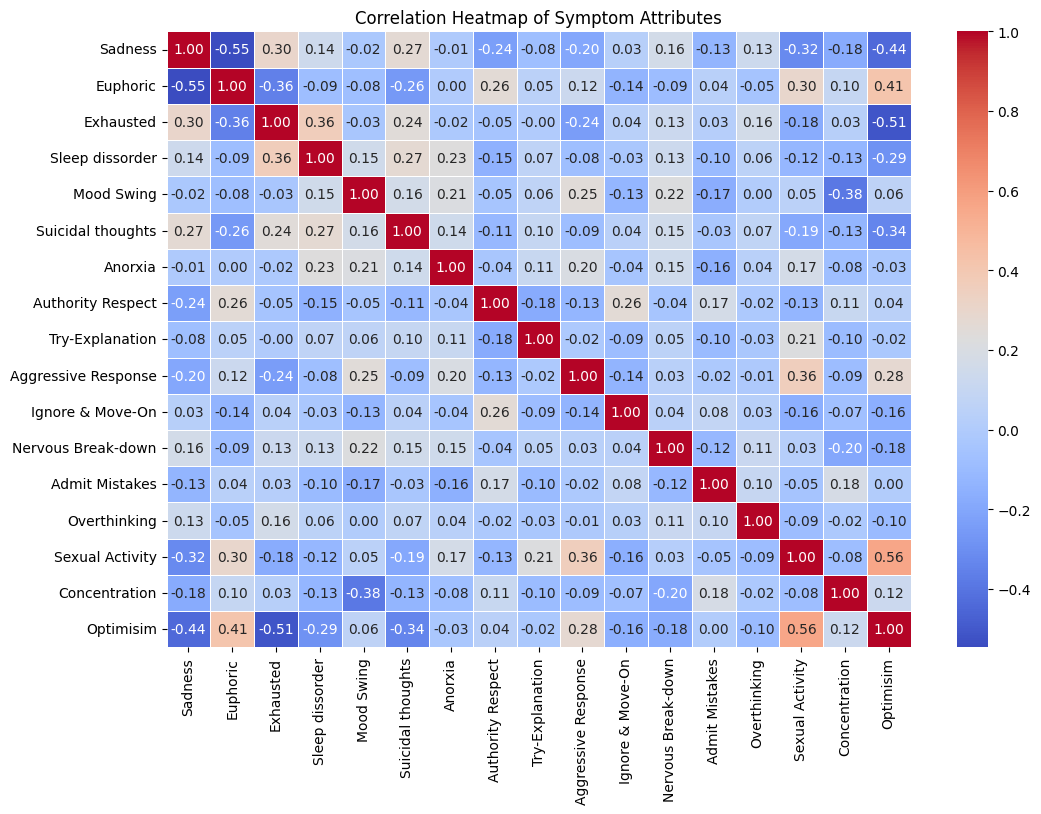

In [11]:
# a few visulizations to start with
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for visualizing relationships or patterns
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Expert Diagnose']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Symptom Attributes')
plt.show()


In [12]:
# other visualizations won't work, why? 
print(df.head())
print(df.info())
# ok, so even though the values were converted to numbers, the types persisted

   Sadness  Euphoric  Exhausted  Sleep dissorder Mood Swing Suicidal thoughts  \
0        3         1          2                2          1                 1   
1        3         1          3                2          0                 1   
2        2         4          2                2          1                 0   
3        3         1          3                4          1                 1   
4        3         3          2                2          0                 0   

  Anorxia Authority Respect Try-Explanation Aggressive Response  \
0       0                 0               1                   0   
1       0                 0               0                   0   
2       0                 0               1                   1   
3       1                 0               1                   0   
4       0                 0               0                   0   

  Ignore & Move-On Nervous Break-down Admit Mistakes Overthinking  \
0                0                  1    

In [13]:
df[yes_no_columns] = df[yes_no_columns].apply(pd.to_numeric, errors='coerce')
df.reset_index(drop=True, inplace=True) # the index can also cause problems so we chuck it, don't need it
print(df.dtypes)

Sadness                 int64
Euphoric                int64
Exhausted               int64
Sleep dissorder         int64
Mood Swing              int64
Suicidal thoughts       int64
Anorxia                 int64
Authority Respect       int64
Try-Explanation         int64
Aggressive Response     int64
Ignore & Move-On        int64
Nervous Break-down      int64
Admit Mistakes          int64
Overthinking            int64
Sexual Activity         int64
Concentration           int64
Optimisim               int64
Expert Diagnose        object
dtype: object


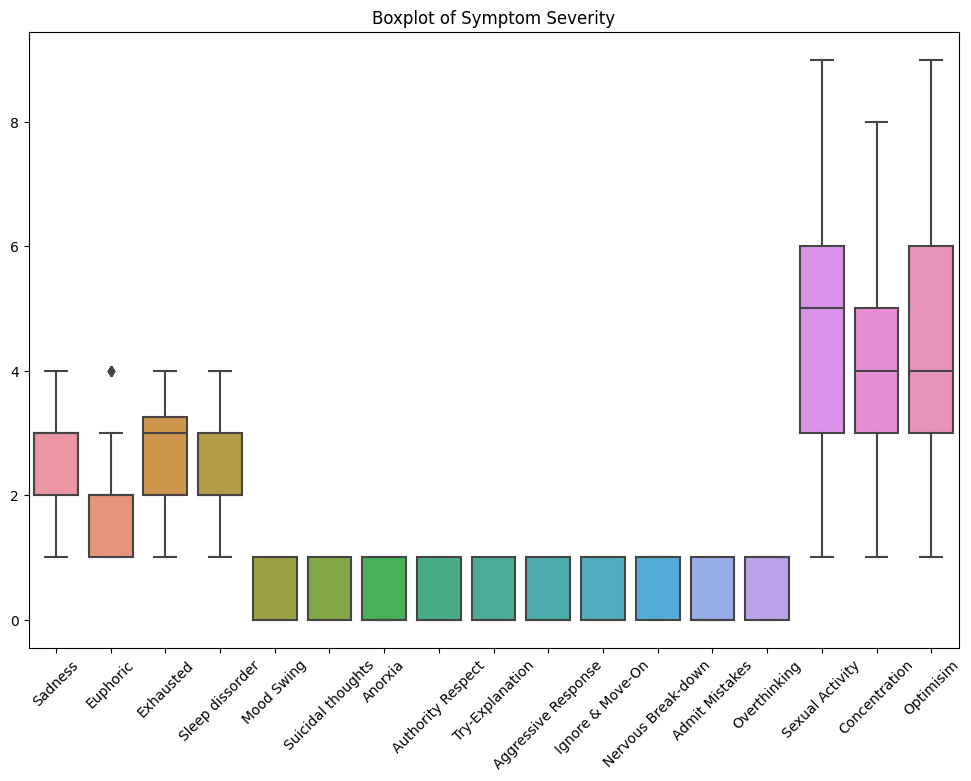

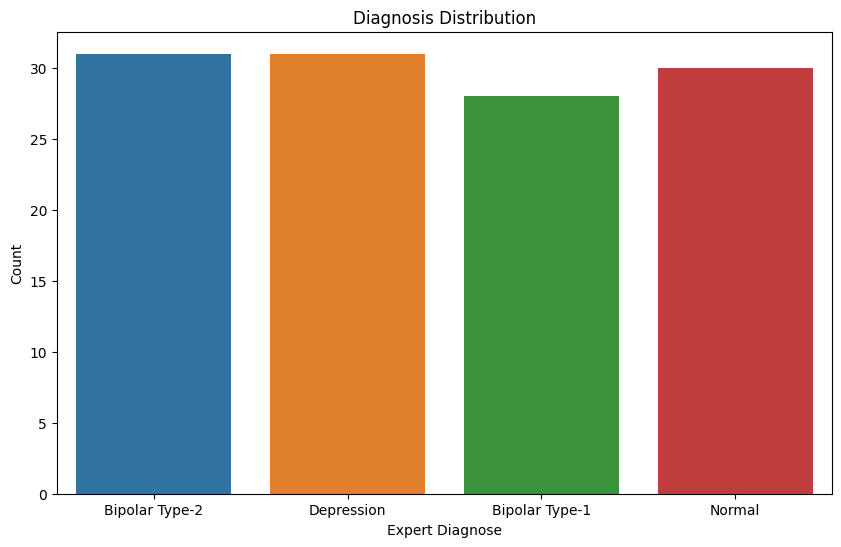

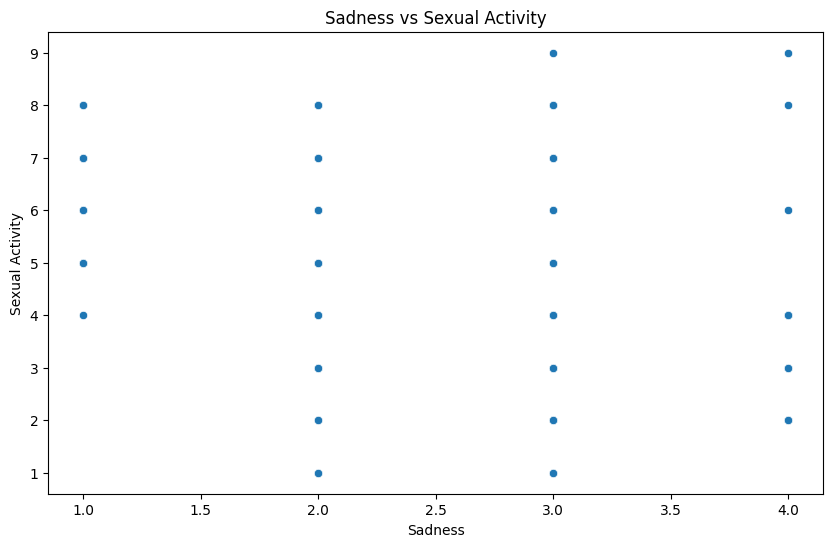

In [14]:
# Boxplot: Best for visualizing the distribution, central tendency, 
# and variability of numerical variables (e.g., symptom severity scores).
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['Expert Diagnose']))
plt.title('Boxplot of Symptom Severity')
plt.xticks(rotation=45)
plt.show()

# Bar Chart: Suitable for visualizing categorical data, 
# such as the frequency or proportion of patients with specific symptoms or diagnoses.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Expert Diagnose')
plt.title('Diagnosis Distribution')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

# Scatterplot: Helpful for exploring relationships between two numerical variables, 
# such as the correlation between different symptoms or attributes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sadness', y='Sexual Activity')
plt.title('Sadness vs Sexual Activity')
plt.xlabel('Sadness')
plt.ylabel('Sexual Activity')
plt.show()